In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Load Data

In [3]:
df = pd.read_csv('Datoscompletos3.csv',sep=";",parse_dates=[10],dayfirst=True)

In [4]:
df.shape

(7902, 13)

In [5]:
df.head()

,id_reserva,Día de semana de fecha_venta,Hora de turno,canal,cpais_id,descuento,genero,provincia,tarifa,tipo_servicio,fecha_venta,familia,precio
0,1,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
1,2,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
2,3,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
3,4,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35
4,5,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35


# 2. Product Analytics

#### - Quantity Distribution

In [6]:
(df.groupby(['tipo_servicio'])['tipo_servicio'].count()).head()

tipo_servicio
tipo_servicio_1    4029
tipo_servicio_2       2
tipo_servicio_3    3850
tipo_servicio_4      21
Name: tipo_servicio, dtype: int64

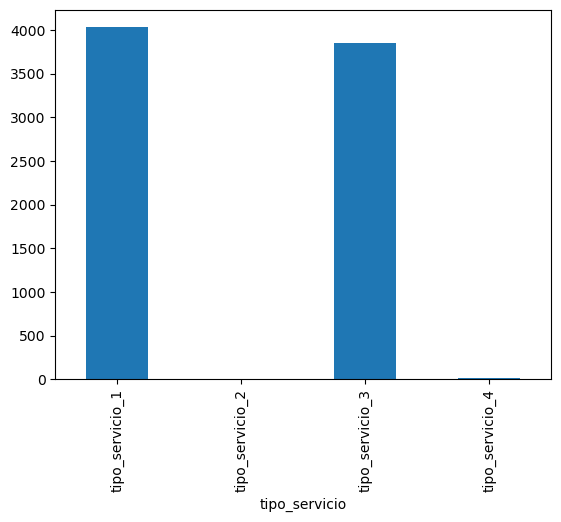

In [7]:
df.groupby('tipo_servicio').size().plot(kind='bar')

In [8]:
pd.DataFrame(df['tipo_servicio'].describe())

,tipo_servicio
count,7902
unique,4
top,tipo_servicio_1
freq,4029


In [9]:
(df.groupby(['precio'])['precio'].count()).head()

precio
35    7868
40      11
43      21
60       2
Name: precio, dtype: int64

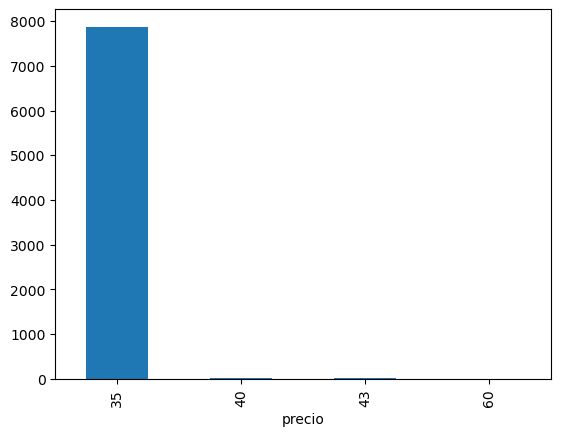

In [10]:
df.groupby('precio').size().plot(kind='bar')

In [11]:
(df.groupby(['familia'])['familia'].count()).head()


familia
familia_1    7788
familia_2      46
familia_3      67
familia_4       1
Name: familia, dtype: int64

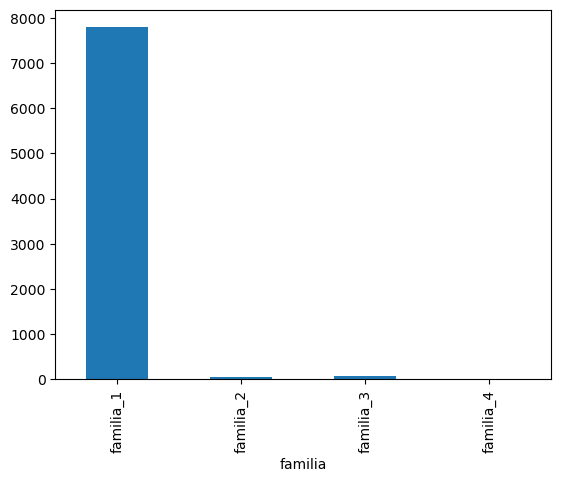

In [12]:
df.groupby('familia').size().plot(kind='bar')

In [13]:
(df.groupby(['provincia'])['provincia'].count()).head()

provincia
PROVINCIA_1    7105
PROVINCIA_2     362
PROVINCIA_3      43
PROVINCIA_4     392
Name: provincia, dtype: int64

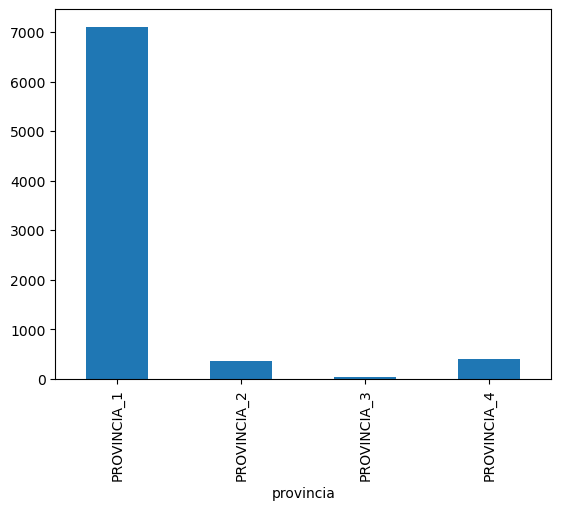

In [14]:
df.groupby('provincia').size().plot(kind='bar')

In [15]:
(df.groupby(['genero'])['genero'].count()).head()

genero
H    7524
M     378
Name: genero, dtype: int64

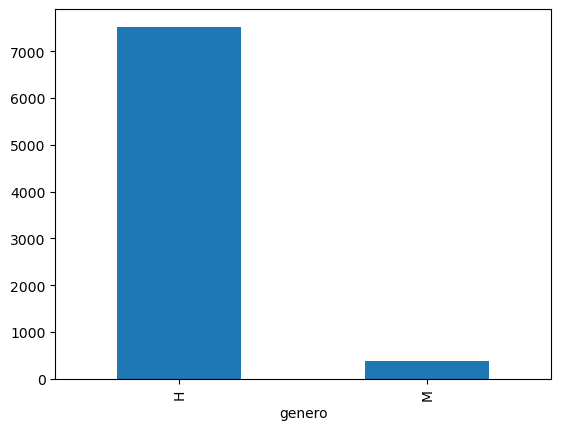

In [16]:
df.groupby('genero').size().plot(kind='bar')

In [17]:
(df.groupby(['descuento'])['descuento'].count()).head()

descuento
0     5026
20    2463
25     413
Name: descuento, dtype: int64

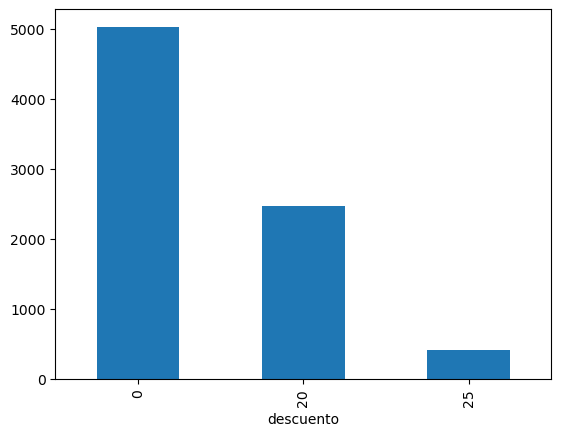

In [18]:
df.groupby('descuento').size().plot(kind='bar')

In [19]:
(df.groupby(['cpais_id'])['cpais_id'].count()).head()

cpais_id
Pais_1    7880
Pais_2       2
Pais_3      16
Pais_4       1
Pais_5       3
Name: cpais_id, dtype: int64

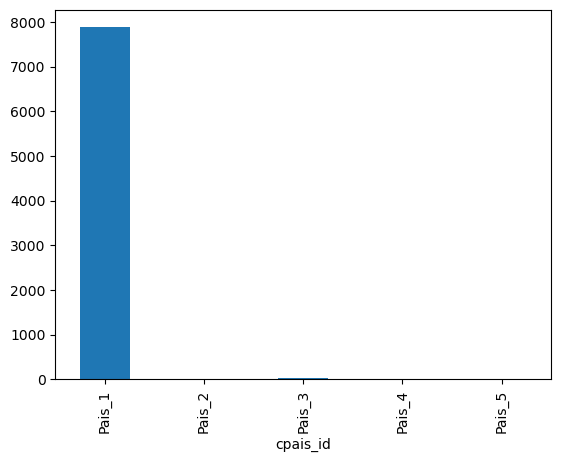

In [20]:
df.groupby('cpais_id').size().plot(kind='bar')

In [21]:
(df.groupby(['canal'])['canal'].count()).head()

canal
canal_1    2520
canal_2    1271
canal_3    4111
Name: canal, dtype: int64

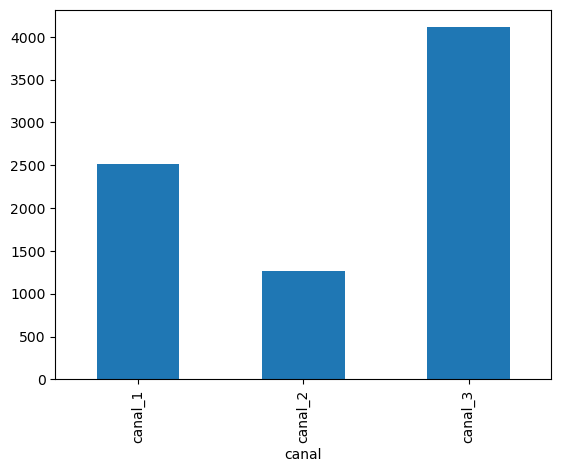

In [22]:
df.groupby('canal').size().plot(kind='bar')

In [23]:
(df.groupby(['Hora de turno'])['Hora de turno'].count()).head()

Hora de turno
10     509
12    1499
14     488
16    1223
18    2278
Name: Hora de turno, dtype: int64

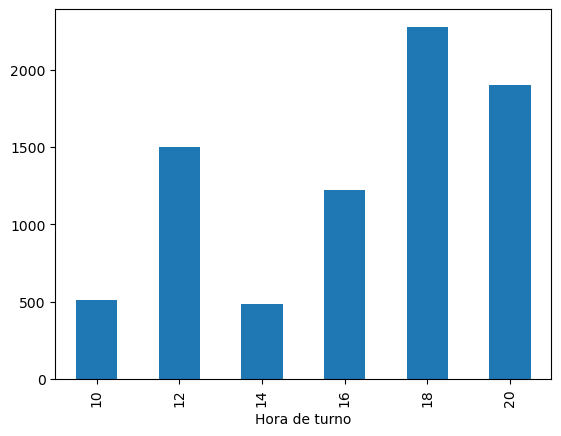

In [24]:
df.groupby('Hora de turno').size().plot(kind='bar')

In [25]:
(df.groupby(['Día de semana de fecha_venta'])['Día de semana de fecha_venta'].count()).head()

Día de semana de fecha_venta
domingo       913
jueves       1168
lunes        1174
martes       1167
miércoles    1161
Name: Día de semana de fecha_venta, dtype: int64

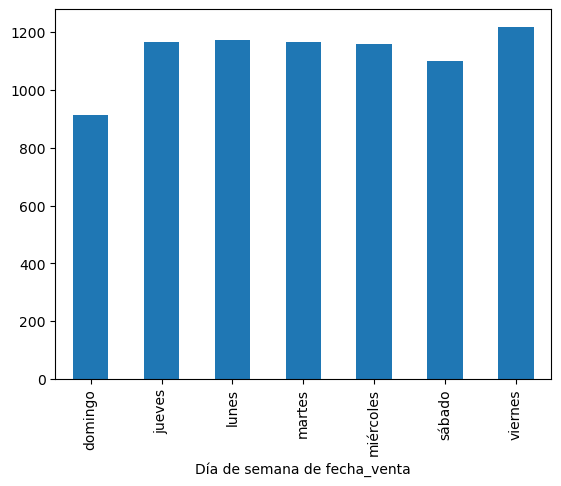

In [26]:
df.groupby('Día de semana de fecha_venta').size().plot(kind='bar')

#### - Time-series Number of Orders

In [27]:
ventas_diarias_df = df.set_index('fecha_venta')['id_reserva'].resample('M').nunique()

In [28]:
ventas_mensuales_df2 = df.set_index('fecha_venta')['id_reserva'].resample('M').nunique().reset_index(name='total')
ventas_mensuales_df2.sort_values(['total'], ascending=False).head()

,fecha_venta,total
36,2020-01-31,482
37,2020-02-29,452
58,2021-11-30,450
57,2021-10-31,447
56,2021-09-30,441


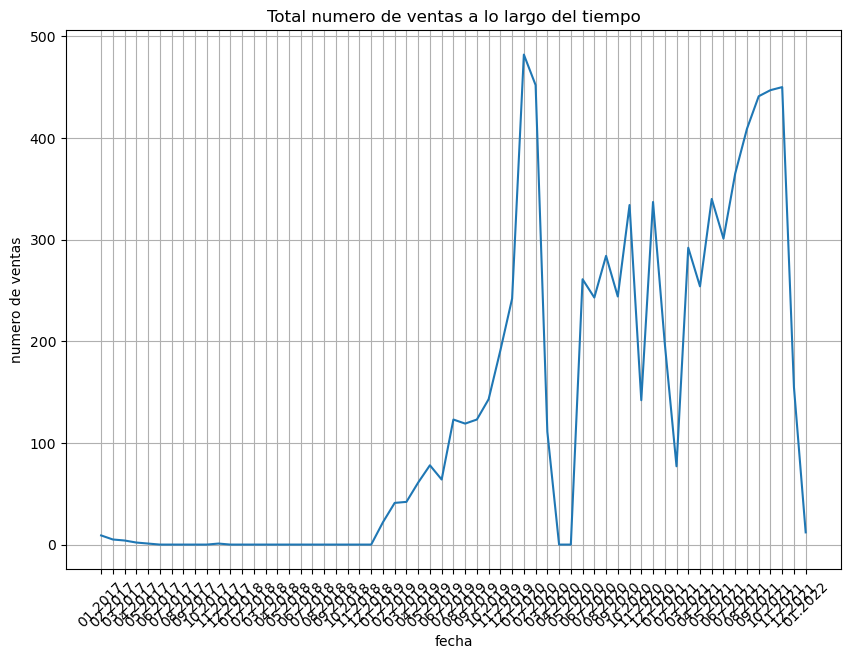

In [29]:
ax = pd.DataFrame(ventas_diarias_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('fecha')
ax.set_ylabel('numero de ventas')
ax.set_title('Total numero de ventas a lo largo del tiempo')

plt.xticks(
    range(len(ventas_diarias_df.index)), 
    [x.strftime('%m.%Y') for x in ventas_diarias_df.index], 
    rotation=45
)

plt.show()

In [30]:
#eliminamos las fechas que tienen escasos datos
extracto_ventas = ventas_mensuales_df2.loc[ ventas_mensuales_df2['fecha_venta'] >= '2018-12-31',:]

In [31]:
extracto_ventas.shape

(38, 2)

#### - Time-series Revenue

In [32]:
precio_final_df=df
precio_final_df['precio_final'] = precio_final_df['precio'] * (1+(precio_final_df['descuento']/100))

In [33]:
precio_final_df.head()

,id_reserva,Día de semana de fecha_venta,Hora de turno,canal,cpais_id,descuento,genero,provincia,tarifa,tipo_servicio,fecha_venta,familia,precio,precio_final
0,1,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
1,2,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
2,3,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
3,4,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
4,5,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0


In [34]:
facturacion_mensual_df = df.set_index('fecha_venta')['precio_final'].resample('M').sum()


In [35]:
facturacion_mensual_df

fecha_venta
2017-01-31      436.45
2017-02-28      232.20
2017-03-31      180.60
2017-04-30       86.00
2017-05-31       51.60
                ...   
2021-09-30    16595.00
2021-10-31    17078.25
2021-11-30    17017.00
2021-12-31     5908.00
2022-01-31      448.00
Freq: M, Name: precio_final, Length: 61, dtype: float64

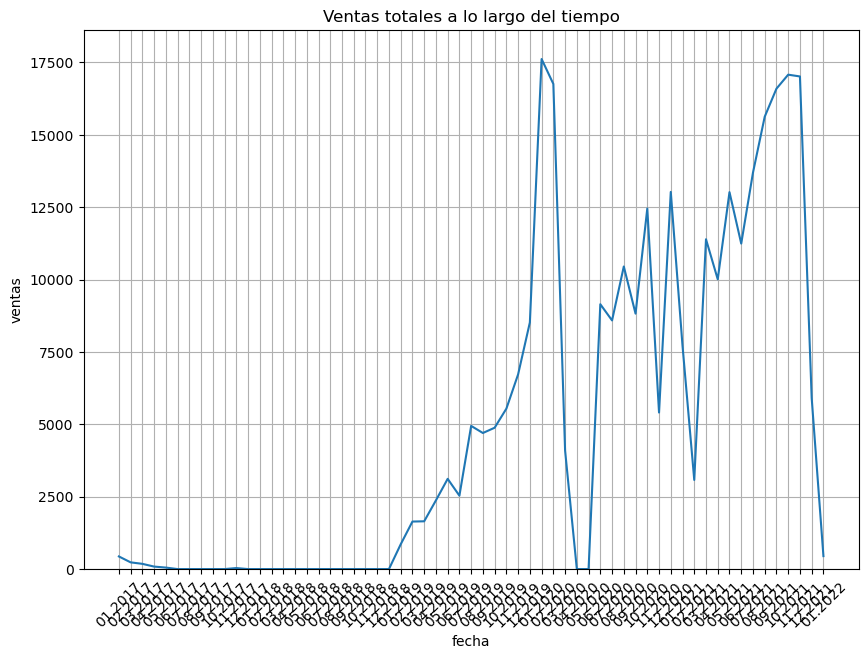

In [36]:
ax = pd.DataFrame(facturacion_mensual_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('fecha')
ax.set_ylabel('ventas')
ax.set_title('Ventas totales a lo largo del tiempo')

ax.set_ylim([0, max(facturacion_mensual_df.values)+1000])

plt.xticks(
    range(len(facturacion_mensual_df.index)), 
    [x.strftime('%m.%Y') for x in facturacion_mensual_df.index], 
    rotation=45
)

plt.show()

In [37]:
precio_final_df.head()

,id_reserva,Día de semana de fecha_venta,Hora de turno,canal,cpais_id,descuento,genero,provincia,tarifa,tipo_servicio,fecha_venta,familia,precio,precio_final
0,1,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
1,2,miércoles,20,canal_1,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
2,3,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
3,4,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0
4,5,miércoles,20,canal_2,Pais_1,0,H,PROVINCIA_1,tarifa_1,tipo_servicio_1,2020-01-01,familia_1,35,35.0


In [38]:
facturacion_mensual_por_producto_df = df.set_index('fecha_venta').groupby(['tipo_servicio'])['precio_final'].resample('M').sum().reset_index(name='total')

with pd.option_context("display.max_rows", None):
    display(facturacion_mensual_por_producto_df)


,tipo_servicio,fecha_venta,total
0,tipo_servicio_1,2019-10-31,1610.00
1,tipo_servicio_1,2019-11-30,6475.00
2,tipo_servicio_1,2019-12-31,8295.00
3,tipo_servicio_1,2020-01-31,11235.00
4,tipo_servicio_1,2020-02-29,9633.75
5,tipo_servicio_1,2020-03-31,2555.00
6,tipo_servicio_1,2020-04-30,0.00
7,tipo_servicio_1,2020-05-31,0.00
8,tipo_servicio_1,2020-06-30,9065.00
9,tipo_servicio_1,2020-07-31,7525.00


In [39]:
ventas_productos_en_tiempo_df = facturacion_mensual_por_producto_df.pivot('fecha_venta','tipo_servicio').fillna(0)

ventas_productos_en_tiempo_df = ventas_productos_en_tiempo_df.reset_index()
ventas_productos_en_tiempo_df = ventas_productos_en_tiempo_df.set_index('fecha_venta')
ventas_productos_en_tiempo_df.columns = ventas_productos_en_tiempo_df.columns.droplevel(0)

ventas_productos_en_tiempo_df

tipo_servicio,tipo_servicio_1,tipo_servicio_2,tipo_servicio_3,tipo_servicio_4
fecha_venta,,,,
2017-01-31,0.00,0.0,0.00,436.45
2017-02-28,0.00,0.0,0.00,232.20
2017-03-31,0.00,0.0,0.00,180.60
2017-04-30,0.00,0.0,0.00,86.00
2017-05-31,0.00,0.0,0.00,51.60
2017-11-30,0.00,0.0,35.00,0.00
2017-12-31,0.00,0.0,0.00,0.00
2018-01-31,0.00,0.0,0.00,0.00
2018-02-28,0.00,0.0,0.00,0.00


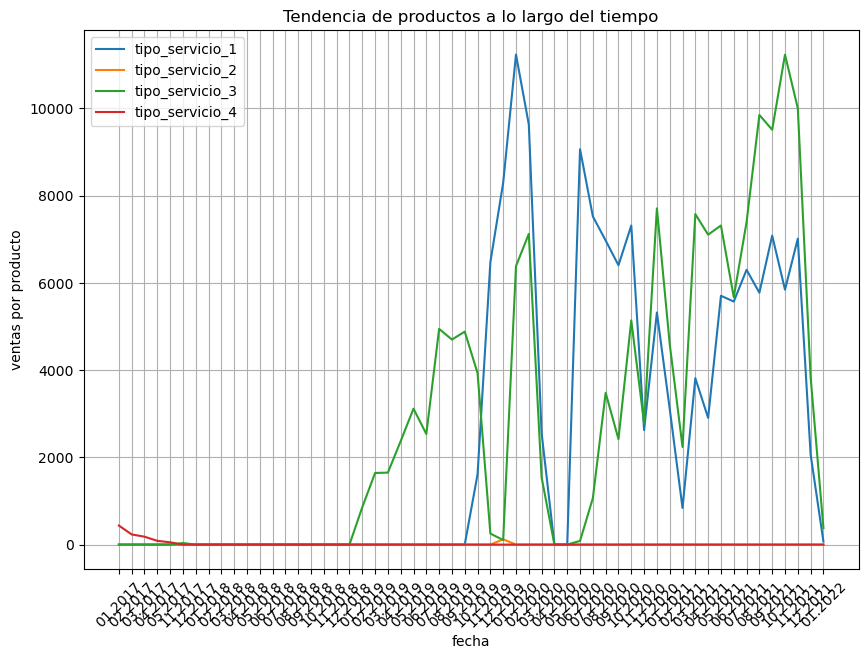

In [40]:
ax = pd.DataFrame(ventas_productos_en_tiempo_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('ventas por producto')
ax.set_xlabel('fecha')
ax.set_title('Tendencia de productos a lo largo del tiempo')

ax.legend(ventas_productos_en_tiempo_df.columns, loc='upper left')

plt.xticks(
    range(len(ventas_productos_en_tiempo_df.index)), 
    [x.strftime('%m.%Y') for x in ventas_productos_en_tiempo_df.index], 
    rotation=45
)

plt.show()